In [2]:
import numpy as np
import json
# 读入训练数据
datafile = r'data/housing.data'
data = np.fromfile(datafile, sep=' ')
print(data.shape)

(7084,)


In [3]:
# 读入之后的数据被转化成1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推.... 
# 这里对原始数据做reshape，变成N x 14的形式
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0]// feature_num, feature_num])
print(data.shape)

(506, 14)


In [4]:
x = data[0]
print(x.shape)
print(x)

(14,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


In [19]:
# 我们将80%的数据用作训练集，20%用作测试集
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]
training_data.shape

(404, 14)

In [20]:
# 计算train数据集的最大值，最小值，平均值
maximums, minimums, avgs = \
                     training_data.max(axis=0), \
                     training_data.min(axis=0), \
     training_data.sum(axis=0) / training_data.shape[0]
# 对数据进行归一化处理
for i in range(feature_num):
    #print(maximums[i], minimums[i], avgs[i])
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

In [5]:
def load_data():
    # 从文件导入数据
    datafile = './data/housing.data'
    data = np.fromfile(datafile, sep=' ')
    

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])
    print(data[0])   
    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]

    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    
    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [22]:
# 获取数据
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


In [23]:
print(x[0])
print(y[0])
print(y.shape)

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]
[0.42222222]
(404, 1)


# https://aistudio.baidu.com/aistudio/projectdetail/1142711


In [24]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        #print(error)
        cost = error * error
        cost = np.mean(cost)
        return cost


In [25]:
net=Network(13)
x1=x[0]
y1=y[0]
z=net.forward(x1)
print(net.loss(z,y1))

3.8864479293740692


In [26]:
net=Network(13)
x1=x[0:3]
y1=y[0:3]
z=net.forward(x1)
print("predict:",z)
cost=net.loss(z,y1)
print("loss:",cost)

predict: [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.384496992612791


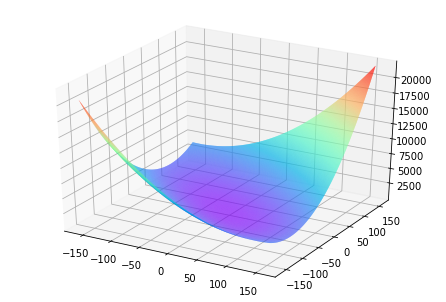

In [27]:
net = Network(13)
losses = []
#只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1)
w9 = np.arange(-160.0, 160.0, 1)
losses = np.zeros([len(w5), len(w9)])

#计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

#使用matplotlib将两个变量和对应的Loss作3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()



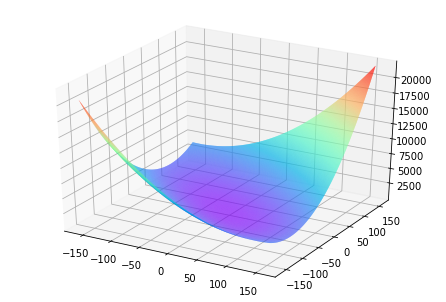

In [28]:
net = Network(13)
losses = []
#只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1)
w9 = np.arange(-160.0, 160.0, 1)
losses = np.zeros([len(w5), len(w9)])

#计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

#使用matplotlib将两个变量和对应的Loss作3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()



In [29]:
# 一个样本时的情况，
print("x.shape {},y.shape{}".format(x.shape,y.shape))
x1=x[0] #第一行 1*13
y1=y[0] #第一行对应的房价
z1=net.forward(x1)
print('x1 {} shape {}'.format(x1,x1.shape))
print('y1 {} shape {}'.format(y1,y1.shape))
print('z1 {} shape {}'.format(z1,z1.shape))

x.shape (404, 13),y.shape(404, 1)
x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991] shape (13,)
y1 [0.42222222] shape (1,)
z1 [130.86954441] shape (1,)


In [30]:
# w0的梯度
gradient_w0=(z1-y1)*x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.]


In [31]:
# w1的梯度变化
gradient_w1=(z1-y1)*x1[1]
print('gradient_w1 {}'.format(gradient_w1))

gradient_w1 [23.48051799]


In [32]:
# 只有一个样本时的梯度变化
gradient_w_x1=(z1-y1)*x1
print(gradient_w_x1)



[  0.          23.48051799   9.58029163   0.          41.06674958
  75.33401592  83.69586171  35.11682862   0.          29.68425495
  37.46891169 130.44732219  11.69850434]


In [33]:
# 样本2对梯度的贡献
x2=x[1]
y2=y[1]
z2=net.forward(x2)
gradient_w_x2=(z2-y2)*x2
gradient_w_x2


array([2.54738434e-02, 0.00000000e+00, 2.83333765e+01, 0.00000000e+00,
       1.86624242e+01, 5.91703008e+01, 8.45121992e+01, 3.76793284e+01,
       4.69458498e+00, 1.23980167e+01, 5.97311025e+01, 1.07975454e+02,
       2.20777626e+01])

In [34]:
# 前3个样本对梯度的贡献
x3=x[0:3]
y3=y[0:3]
z3=net.forward(x3)
print('x3 {}, shape {}'.format(x3, x3.shape))
print('y3 {}, shape {}'.format(y3, y3.shape))
print('z3 {}, shape {}'.format(z3, z3.shape))



x3 [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y3 [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z3 [[130.86954441]
 [108.34434338]
 [131.3204395 ]], shape (3, 1)


In [35]:
gradient_w=(z3-y3)*x3
print('gradient_w {} shape {}'.format(gradient_w,gradient_w.shape))

gradient_w [[0.00000000e+00 2.34805180e+01 9.58029163e+00 0.00000000e+00
  4.10667496e+01 7.53340159e+01 8.36958617e+01 3.51168286e+01
  0.00000000e+00 2.96842549e+01 3.74689117e+01 1.30447322e+02
  1.16985043e+01]
 [2.54738434e-02 0.00000000e+00 2.83333765e+01 0.00000000e+00
  1.86624242e+01 5.91703008e+01 8.45121992e+01 3.76793284e+01
  4.69458498e+00 1.23980167e+01 5.97311025e+01 1.07975454e+02
  2.20777626e+01]
 [3.07963708e-02 0.00000000e+00 3.42860463e+01 0.00000000e+00
  2.25832858e+01 9.07287666e+01 7.83155260e+01 4.55955257e+01
  5.68088867e+00 1.50027645e+01 7.22802431e+01 1.29029688e+02
  8.29246719e+00]] shape (3, 13)


In [36]:
# 所有样本
z=net.forward(x)
#以下两句等同于gradient_w=np.dot(x.T,z-y)/len(z)
#gradient_w=(z-y)*x
#gradient_w=np.mean(gradient_w,axis=0,keepdims=True)

gradient_w=np.dot(x.T,z-y)/len(z)
print('gradient_w {} shape {}'.format(gradient_w,gradient_w.shape))
print("net_w {},shape {}".format(net.w,net.w.shape))

gradient_w [[  4.6555403 ]
 [ 19.35268996]
 [ 55.88081118]
 [ 14.00266972]
 [ 47.98588869]
 [ 76.87210821]
 [ 94.8555119 ]
 [ 36.07579608]
 [ 45.44575958]
 [ 59.65733292]
 [ 83.65114918]
 [134.80387478]
 [ 38.93998153]] shape (13, 1)
net_w [[ 1.76405235e+00]
 [ 4.00157208e-01]
 [ 9.78737984e-01]
 [ 2.24089320e+00]
 [ 1.86755799e+00]
 [ 1.59000000e+02]
 [ 9.50088418e-01]
 [-1.51357208e-01]
 [-1.03218852e-01]
 [ 1.59000000e+02]
 [ 1.44043571e-01]
 [ 1.45427351e+00]
 [ 7.61037725e-01]],shape (13, 1)


In [37]:
gradient_b=np.sum(z-y)/len(z)
gradient_b


142.50289323156107

In [38]:
class Network2(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        print(x.shape,self.w.shape)
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        #print(error)
        cost = error * error
        cost = np.mean(cost)
        return cost

    def gradient(self,x,y):
        z=self.forward(x)
        gradient_w=np.dot(x.T,z-y)/len(z)
        gradient_b=np.sum(z-y)/len(z)
        return gradient_w,gradient_b  

    def update(self,gradient_w,gradient_b,learning_rate):
        print("w.shape {},dw.shape{}".format(self.w.shape,gradient_w.shape))
        self.w=self.w-learning_rate*gradient_w
        self.b=self.b-learning_rate*gradient_b

In [39]:
net=Network2(13)
net.w[5]=-100
net.w[9]=-100

z=net.forward(x)
loss=net.loss(z,y)
gradient_w,gradient_b=net.gradient(x,y)
print(gradient_w.shape)
gradient_w5=gradient_w[5]
gradient_w9=gradient_w[9]
print('point w5:{},dw5 {}'.format(net.w[5],gradient_w5))
print('point w9:{},dw9 {}'.format(net.w[9],gradient_w9))


(404, 13) (13, 1)
(404, 13) (13, 1)
(13, 1)
point w5:[-100.],dw5 [-45.87968288]
point w9:[-100.],dw9 [-35.50236884]


In [40]:
net=Network2(13)

for i in range(2):
    z=net.forward(x)
    loss=net.loss(z,y)
    print(loss)
    gradient_w,gradient_b=net.gradient(x,y)
    #net.update(gradient_w,gradient_w,0.01)

(404, 13) (13, 1)
8.745954466634588
(404, 13) (13, 1)
(404, 13) (13, 1)
8.745954466634588
(404, 13) (13, 1)


In [41]:
# w0的梯度
gradient_w0=(z1-y1)*x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.]


In [42]:
# w1的梯度变化
gradient_w1=(z1-y1)*x1[1]
print('gradient_w1 {}'.format(gradient_w1))

gradient_w1 [23.48051799]


In [43]:
# 只有一个样本时的梯度变化
gradient_w_x1=(z1-y1)*x1
print(gradient_w_x1)



[  0.          23.48051799   9.58029163   0.          41.06674958
  75.33401592  83.69586171  35.11682862   0.          29.68425495
  37.46891169 130.44732219  11.69850434]


In [44]:
# 样本2对梯度的贡献
x2=x[1]
y2=y[1]
z2=net.forward(x2)
gradient_w_x2=(z2-y2)*x2
gradient_w_x2


(13,) (13, 1)


array([4.95115308e-04, 0.00000000e+00, 5.50693832e-01, 0.00000000e+00,
       3.62727044e-01, 1.15004718e+00, 1.64259797e+00, 7.32343840e-01,
       9.12450018e-02, 2.40970621e-01, 1.16094704e+00, 2.09863504e+00,
       4.29108324e-01])

In [45]:
# 前3个样本对梯度的贡献
x3=x[0:3]
y3=y[0:3]
z3=net.forward(x3)
print('x3 {}, shape {}'.format(x3, x3.shape))
print('y3 {}, shape {}'.format(y3, y3.shape))
print('z3 {}, shape {}'.format(z3, z3.shape))



(3, 13) (13, 1)
x3 [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y3 [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z3 [[2.39362982]
 [2.46752393]
 [2.02483479]], shape (3, 1)


In [46]:
gradient_w=(z3-y3)*x3
print('gradient_w {} shape {}'.format(gradient_w,gradient_w.shape))

gradient_w [[0.00000000e+00 3.54853368e-01 1.44783806e-01 0.00000000e+00
  6.20628319e-01 1.13849828e+00 1.26486811e+00 5.30709115e-01
  0.00000000e+00 4.48608410e-01 5.66255375e-01 1.97140760e+00
  1.76795660e-01]
 [4.95115308e-04 0.00000000e+00 5.50693832e-01 0.00000000e+00
  3.62727044e-01 1.15004718e+00 1.64259797e+00 7.32343840e-01
  9.12450018e-02 2.40970621e-01 1.16094704e+00 2.09863504e+00
  4.29108324e-01]
 [3.21688482e-04 0.00000000e+00 3.58140452e-01 0.00000000e+00
  2.35897372e-01 9.47722033e-01 8.18057517e-01 4.76275452e-01
  5.93406432e-02 1.56713807e-01 7.55014992e-01 1.34780052e+00
  8.66203097e-02]] shape (3, 13)


In [47]:
# 所有样本
z=net.forward(x)
#以下两句等同于gradient_w=np.dot(x.T,z-y)/len(z)
#gradient_w=(z-y)*x
#gradient_w=np.mean(gradient_w,axis=0,keepdims=True)

gradient_w=np.dot(x.T,z-y)/len(z)
print('gradient_w {} shape {}'.format(gradient_w,gradient_w.shape))
print("net_w {},shape {}".format(net.w,net.w.shape))

(404, 13) (13, 1)
gradient_w [[0.10197566]
 [0.20327718]
 [1.21762392]
 [0.43059902]
 [1.05326594]
 [1.29064465]
 [1.95461901]
 [0.5342187 ]
 [0.88702053]
 [1.15069786]
 [1.5790441 ]
 [2.43714929]
 [0.87116361]] shape (13, 1)
net_w [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]],shape (13, 1)


In [48]:
gradient_b=np.sum(z-y)/len(z)
gradient_b


2.599327274554706

In [49]:
class Network3(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        #print(x.shape,self.w.shape)
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        #print(error)
        cost = error * error
        cost = np.mean(cost)
        return cost

    def gradient(self,x,y):
        z=self.forward(x)
        gradient_w=np.dot(x.T,z-y)/len(z)
        gradient_b=np.sum(z-y)/len(z)
        return gradient_w,gradient_b  

    def update(self,gradient_w,gradient_b,learning_rate):
        #print("w.shape {},dw.shape{}".format(self.w.shape,gradient_w.shape))
        self.w=self.w-learning_rate*gradient_w
        self.b=self.b-learning_rate*gradient_b

In [50]:
net=Network3(13)
net.w[5]=-100
net.w[9]=-100

z=net.forward(x)
loss=net.loss(z,y)
gradient_w,gradient_b=net.gradient(x,y)
print(gradient_w.shape)
gradient_w5=gradient_w[5]
gradient_w9=gradient_w[9]
print('point w5:{},dw5 {}'.format(net.w[5],gradient_w5))
print('point w9:{},dw9 {}'.format(net.w[9],gradient_w9))


(13, 1)
point w5:[-100.],dw5 [-45.87968288]
point w9:[-100.],dw9 [-35.50236884]


[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


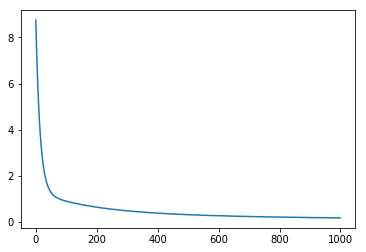

In [51]:
net=Network3(13)
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]

NUMS=1000
losses=[]
for i in range(NUMS):
    z=net.forward(x)
    loss=net.loss(z,y)
    losses.append(loss)
    gradient_w,gradient_b=net.gradient(x,y)
    net.update(gradient_w,gradient_b,0.01)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plot_x = np.arange(NUMS)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [10]:
class Network4(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b

    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i+1) % 10 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses

# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network4(13)
num_iterations=1000
# 启动训练
losses = net.train(x,y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]
iter 9, loss 5.143394325795511
iter 19, loss 3.097924194225988
iter 29, loss 2.082241020617026
iter 39, loss 1.5673801618157397
iter 49, loss 1.2966204735077431
iter 59, loss 1.1453399043319765
iter 69, loss 1.0530155717435201
iter 79, loss 0.9902292156463155
iter 89, loss 0.9426576903842504
iter 99, loss 0.9033048096880774
iter 109, loss 0.868732003041364
iter 119, loss 0.837229250968144
iter 129, loss 0.807927474161227
iter 139, loss 0.7803677341465797
iter 149, loss 0.7542920908532763
iter 159, loss 0.7295420168915829
iter 169, loss 0.7060090054240882
iter 179, loss 0.6836105084697767
iter 189, loss 0.6622781710179412
iter 199, loss 0.6419520361168637
iter 209, loss 0.622577651786949
iter 219, loss 0.6041045903195837
iter 229, loss 0.5864856570315078
iter 239, loss 0.5696764374763879
iter 249, loss 0.5536350125932015
iter 259, loss 0.53832175

NameError: name 'plt' is not defined

In [11]:
# 随机梯度下降法
train_data,test_date=load_data()
train_data1=train_data[0:10]
train_data1.shape

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


(10, 14)

In [ ]:
net=Network4(13)
x=train_data1[:,:-1]
y=train_data1[:,-1:]
loss=net.train(x,y,iterations=1,eta=0.1)
loss

In [ ]:
batch_size=10
n=len(train_data)
mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]
print('total number of mini_batches is ', len(mini_batches))
print('first mini_batch shape ', mini_batches[0].shape)
print('last mini_batch shape ', mini_batches[-1].shape)

In [ ]:
a=np.array([1,2,3,4,5,6,7,8,9,10])
print('before shuffle:',a)
np.random.shuffle(a)
print('after shuffle:',a)

In [ ]:
train_data,test_date=load_data()
np.random.shuffle(train_data)
batch_size=10
n=len(train_data)
mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]
net=Network4(13)
for mini_batch in mini_batches:
  x=mini_batch[:,:-1]
  y=mini_batch[:,-1:]
  loss=net.train(x,y,iterations=1)

In [ ]:
class Network5(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b

    def train(self, training_data, num_epoches,batch_size=10, eta=0.01):
        losses = []
        n=len(train_data)
        for epoch_id in range(num_epoches):
            np.random.shuffle(train_data)                       
            mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]            
            for iter_id,mini_batch in enumerate(mini_batches):
                x=mini_batch[:,:-1]
                y=mini_batch[:,-1:]                
                z = self.forward(x)
                loss = self.loss(z, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.format(epoch_id, iter_id, loss))
        return losses
    
    
train_data,test_data=load_data()
net=Network5(13)
losses=net.train(train_data,num_epoches=50,batch_size=100,eta=0.1)

# 画出损失函数的变化趋势
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

[4.497480200683046]

In [15]:
batch_size=10
n=len(train_data)
mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]
print('total number of mini_batches is ', len(mini_batches))
print('first mini_batch shape ', mini_batches[0].shape)
print('last mini_batch shape ', mini_batches[-1].shape)

total number of mini_batches is  41
first mini_batch shape  (10, 14)
last mini_batch shape  (4, 14)


In [16]:
a=np.array([1,2,3,4,5,6,7,8,9,10])
print('before shuffle:',a)
np.random.shuffle(a)
print('after shuffle:',a)

before shuffle: [ 1  2  3  4  5  6  7  8  9 10]
after shuffle: [ 6  2 10  3  7  8  1  4  5  9]


In [21]:
train_data,test_date=load_data()
np.random.shuffle(train_data)
batch_size=10
n=len(train_data)
mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]
net=Network4(13)
for mini_batch in mini_batches:
  x=mini_batch[:,:-1]
  y=mini_batch[:,-1:]
  loss=net.train(x,y,iterations=1)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]
Epoch   0 / iter   0, loss = 10.1354
Epoch   0 / iter   1, loss = 3.8290
Epoch   0 / iter   2, loss = 1.9208
Epoch   0 / iter   3, loss = 1.7740
Epoch   0 / iter   4, loss = 0.3366
Epoch   1 / iter   0, loss = 1.6275
Epoch   1 / iter   1, loss = 0.9842
Epoch   1 / iter   2, loss = 0.9121
Epoch   1 / iter   3, loss = 0.9971
Epoch   1 / iter   4, loss = 0.6071
Epoch   2 / iter   0, loss = 0.7689
Epoch   2 / iter   1, loss = 0.8547
Epoch   2 / iter   2, loss = 0.9428
Epoch   2 / iter   3, loss = 0.9791
Epoch   2 / iter   4, loss = 0.4608
Epoch   3 / iter   0, loss = 0.6148
Epoch   3 / iter   1, loss = 0.9085
Epoch   3 / iter   2, loss = 0.6771
Epoch   3 / iter   3, loss = 0.7770
Epoch   3 / iter   4, loss = 0.5468
Epoch   4 / iter   0, loss = 0.9681
Epoch   4 / iter   1, loss = 0.6268
Epoch   4 / iter   2, loss = 0.5268
Epoch   4 / iter   3, loss =

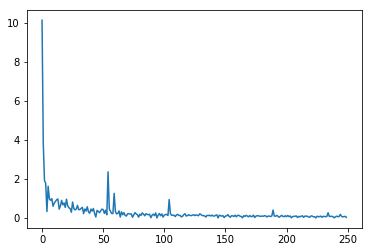

In [29]:
class Network5(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b

    def train(self, training_data, num_epoches,batch_size=10, eta=0.01):
        losses = []
        n=len(train_data)
        for epoch_id in range(num_epoches):
            np.random.shuffle(train_data)                       
            mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]            
            for iter_id,mini_batch in enumerate(mini_batches):
                x=mini_batch[:,:-1]
                y=mini_batch[:,-1:]                
                z = self.forward(x)
                loss = self.loss(z, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.format(epoch_id, iter_id, loss))
        return losses
    
    
train_data,test_data=load_data()
net=Network5(13)
losses=net.train(train_data,num_epoches=50,batch_size=100,eta=0.1)

# 画出损失函数的变化趋势
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()